<a href="https://colab.research.google.com/github/Saify-Technologies/simple-linear-regression-jax-pytorch-tensorflow/blob/main/linear_regression_practise_from_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.basics import *

In [ ]:
from matplotlib import *

In [ ]:
n= 100 #this is point numbers
x = torch.ones(n,2)

In [ ]:
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.5811,  1.0000],
        [ 0.3998,  1.0000],
        [-0.8452,  1.0000],
        [-0.8438,  1.0000],
        [ 0.0424,  1.0000]])

In [ ]:
from fastai.torch_core import tensor
a = tensor(3.,2);a

tensor([3., 2.])

In [ ]:
y=x@a + 0.25*torch.randn(n)
(x@a).size() , x.size(),a

(torch.Size([100]), torch.Size([100, 2]), tensor([3., 2.]))

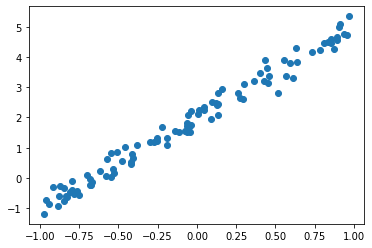

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], y);


In [ ]:
a = tensor(-.5,.5)

In [ ]:
ypred=x@a 

In [ ]:
ypred

tensor([0.7905, 0.3001, 0.9226, 0.9219, 0.4788, 0.7535, 0.4323, 0.6256, 0.3502,
        0.9155, 0.0174, 0.9808, 0.2779, 0.4552, 0.0643, 0.0458, 0.8986, 0.8339,
        0.2149, 0.5261, 0.4335, 0.1075, 0.0536, 0.6258, 0.5707, 0.3194, 0.8912,
        0.9118, 0.9035, 0.9572, 0.1799, 0.2703, 0.6363, 0.5383, 0.7387, 0.7624,
        0.0318, 0.5176, 0.2847, 0.4335, 0.4952, 0.7854, 0.0536, 0.0463, 0.8487,
        0.5190, 0.5310, 0.8807, 0.8408, 0.7093, 0.4364, 0.9388, 0.7748, 0.8402,
        0.5275, 0.5966, 0.5327, 0.7287, 0.0824, 0.5324, 0.9704, 0.2875, 0.1947,
        0.4933, 0.2406, 0.4208, 0.8376, 0.7081, 0.8978, 0.7029, 0.5563, 0.0946,
        0.7684, 0.0228, 0.4398, 0.2212, 0.3621, 0.8962, 0.6113, 0.5209, 0.1841,
        0.9407, 0.1330, 0.9861, 0.8755, 0.3539, 0.6508, 0.2022, 0.0725, 0.2752,
        0.8091, 0.7091, 0.4776, 0.7736, 0.9358, 0.3707, 0.6903, 0.4533, 0.5965,
        0.0718])

tensor(-0.5811)

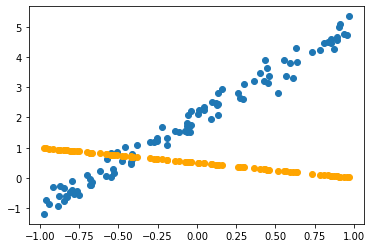

In [ ]:
plt.scatter(x[:,0], y);
plt.scatter(x[:,0], ypred,c="orange");
x[0,0]

In [ ]:
def mse(ypred,y): 
    return ((ypred - y)**2).mean()

In [ ]:
ypred[0] , y[0]

(tensor(0.7905), tensor(0.0689))

In [ ]:
pre= mse(ypred,y)

In [ ]:
pre

tensor(5.8341)

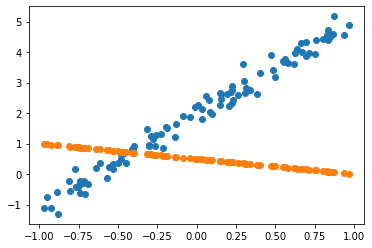

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], y);
plt.scatter(x[:,0],ypred);

In [ ]:
a = nn.Parameter(a) ; a

Parameter containing:
tensor([-0.5000,  0.5000], requires_grad=True)

In [ ]:
def update():
  ypred = x@a
  loss = mse(ypred,y)
  if t % 10 == 0 : print(loss)
  loss.backward()
  with torch.no_grad():
    # loss.backward() #this was also working fine . What torch.no_grad() does is it actually put gradient to false for those variable which are initialized or created inside it . In this case it was working fine it is not creating new variable .
    a.sub_(lr*a.grad)
    a.grad.zero_()
    

In [ ]:
lr  = 1e-1
epoch = 100
for t in range(100):
  update()

tensor(6.2065, grad_fn=<MeanBackward0>)
tensor(1.1873, grad_fn=<MeanBackward0>)
tensor(0.3676, grad_fn=<MeanBackward0>)
tensor(0.1440, grad_fn=<MeanBackward0>)
tensor(0.0813, grad_fn=<MeanBackward0>)
tensor(0.0636, grad_fn=<MeanBackward0>)
tensor(0.0587, grad_fn=<MeanBackward0>)
tensor(0.0573, grad_fn=<MeanBackward0>)
tensor(0.0569, grad_fn=<MeanBackward0>)
tensor(0.0568, grad_fn=<MeanBackward0>)


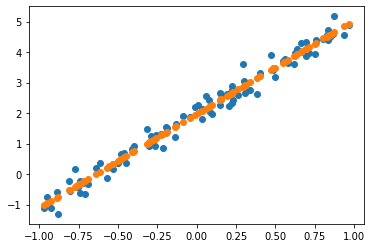

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach());

In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

a = nn.Parameter(tensor(-100.,100.))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)